Đã xử lý: ha-long-bay-in-vietnam.jpg


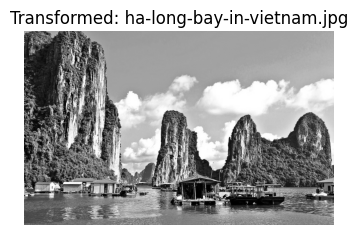

Đã xử lý: pagoda.jpg


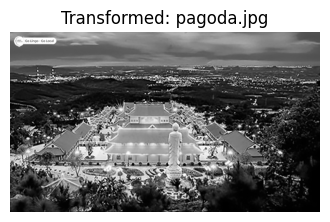

Đã xử lý: quang_ninh.jpg


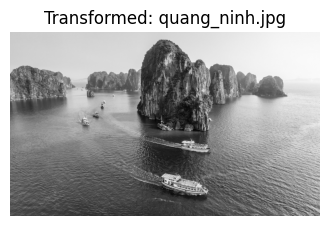

In [3]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

def show_image(image, title="Ảnh"):
    plt.figure(figsize=(4, 4))
    cmap = 'gray' if len(image.shape) == 2 else None
    plt.imshow(image, cmap=cmap)
    plt.title(title)
    plt.axis("off")
    plt.show()

def inverse_transform(image):
    return cv2.bitwise_not(image)

def gamma_correction(image, gamma=1.5):
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255 for i in range(256)]).astype("uint8")
    return cv2.LUT(image, table)

def log_transformation(image):
    image = image.astype(np.float32)
    c = 255 / np.log(1 + np.max(image))
    return (c * (np.log(image + 1))).astype(np.uint8)

def histogram_equalization(image):
    if len(image.shape) == 2:
        return cv2.equalizeHist(image)
    else:
        channels = cv2.split(image)
        eq_channels = [cv2.equalizeHist(ch) for ch in channels]
        return cv2.merge(eq_channels)

def contrast_stretching(image):
    min_val, max_val = np.min(image), np.max(image)
    return ((image - min_val) * (255 / (max_val - min_val))).astype(np.uint8)

def process_images(transformation_func, output_folder):
    input_folder = "exercise"
    os.makedirs(output_folder, exist_ok=True)
    
    for filename in os.listdir(input_folder):
        if filename.lower().endswith((".png", ".jpg", ".jpeg")):
            image_path = os.path.join(input_folder, filename)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            transformed_image = transformation_func(image)
            output_path = os.path.join(output_folder, filename)
            cv2.imwrite(output_path, transformed_image)
            print(f"Đã xử lý: {filename}")
            show_image(transformed_image, f"Transformed: {filename}")

option = input("Chọn phương pháp (I/G/L/H/C): ").strip().upper()

if option == "I":
    process_images(inverse_transform, "output_inverse")
elif option == "G":
    process_images(lambda img: gamma_correction(img, 1.5), "output_gamma")
elif option == "L":
    process_images(log_transformation, "output_log")
elif option == "H":
    process_images(histogram_equalization, "output_histogram")
elif option == "C":
    process_images(contrast_stretching, "output_contrast")
else:
    print("Lựa chọn không hợp lệ.")